Lab 7: 

1. Please answer these questions which are related to SVM. Refer the lecture notes titled 
“Support Vector Machine” and “Perceptron” before start the assignment.

1.1 In SVM what is the meaning of margin? Which are the equations of the two margin hyperplans H+ and H- ? (1 Mark)

The margin describes the ditance from the hyperplane (line) and the closest datapoints. It can also be described as the distance between H+ and H-. Simply put it is "the shortest distance between the observations and the threshold". 

The equations for the hyperplans H+ and H- are as follows: 
H+: w.x + b = 1
H-: w.x + b = -1

Note w.x == w^(T)x


1.2 Consider the three linearly separable two-dimensional input vectors in the figure. Find the linear SVM that optimally separates the classes by maximizing the margin. (1 Mark)


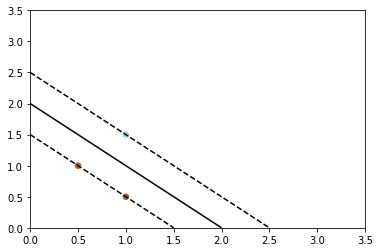

y = -x + 2


In [6]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

X = np.array([[.5, 1], [1,.5], [1, 1.5]])
y = np.array([1, 1, 0])

clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.arange(0, 4, 0.5)
yy = np.arange(0, 4, 0.5)

YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.show()
print("y = -x + 2")

1.3 What is a kernel function? (1 Mark)

The kernel function is a method by which the training data is mapped to a higher dimension. This will allow for linear seperation at higher dimensions. In short allows us to map to a new "feature space". The kernel function is a "transformation function" from the input space to the "feature spaces".



2. Compare Neural Network and SVM in Classification of heart disease data set in Python 
language. You can use the sklearn Python library to implement both Neural Networks and SVM.
For SVM, build the model by changing the different kernels such as Linear, Gaussian and Sigmoid 
and note down the model accuracy. Similarly, use Stochastic Gradient Descent and Adam Gradient 
Descent to build the multi-layer Neural Network and note down the model accuracy for each. 
Finally, tell us which model performs better and why?

In [10]:
# Comparison of Network and SVM
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.model_selection import train_test_split as TTT

df = pd.read_csv('heart-disease-dataset1.csv')
df = df.replace('?', np.nan)
df = df.dropna()

X=df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = TTT(X, y, test_size=0.3, random_state=100)

print('Support Vector Classifications')

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
print('Linear Kernel:', clf.score(X_test, y_test))

clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
print('Gaussian RBF:', clf.score(X_test, y_test))

clf = SVC(kernel='sigmoid')
clf.fit(X_train, y_train)
print('Sigmoid:', clf.score(X_test, y_test))

print('-------------------------------------------------------------------')

print('Multi-Layer Neural Networks')
clf = MLP(solver='sgd', random_state=1, max_iter=1000)
clf.fit(X_train, y_train)
print('MLP SGD:', clf.score(X_test, y_test))

clf = MLP(solver='adam', random_state=1, max_iter=1000)
clf.fit(X_train, y_train)
print('MLP Adam:', clf.score(X_test, y_test))


Support Vector Classifications
Linear Kernel: 0.5888888888888889
Gaussian RBF: 0.5777777777777777
Sigmoid: 0.5777777777777777
-------------------------------------------------------------------
Multi-Layer Neural Networks
MLP SGD: 0.16666666666666666
MLP Adam: 0.5333333333333333
